In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("Indian_UPI_Data.csv")
data.head()

,TransactionID,UserID,Amount,Timestamp,MerchantCategory,TransactionType,DeviceID,IPAddress,Latitude,Longitude,AvgTransactionAmount,TransactionFrequency,UnusualLocation,UnusualAmount,NewDevice,FailedAttempts,FraudFlag,PhoneNumber,BankName
0,842835309389,b0b99baa-1fd2-41e5-ac94-37aa0ec862f9,8589.00,2024-01-22 03:59:58,Electronics,P2M,42296fa1-8d7a-478c-a8c9-590b9d14cdb9,75.122.84.213,23.354478,-40.536076,670.31,5/day,False,True,False,2,True,2798604680,Bank of Baroda
1,592863054785,0cc467c5-8b71-4ba4-9c75-4a9e2bec2c8c,9090.54,2024-07-01 13:43:33,Electronics,P2M,e566b8a8-17c3-4372-9e07-e4c4eb3113b7,16.110.81.53,-62.956912,-102.511919,7265.96,3/day,False,True,False,2,False,3614149152,ICICI Bank
2,373481869464,f7de03ee-b7f5-4568-8ba2-e889bced4d88,8814.41,2024-04-02 05:23:39,Electronics,P2P,897d0824-bc4f-4ee7-9bfb-c8eea31b2ca2,6.47.215.37,-13.112830,-18.978059,8750.89,3/day,True,False,True,3,False,912661191911,ICICI Bank
3,285572156436,456b3f39-e9cc-429f-8568-125612c12987,3971.25,2024-06-14 16:13:43,Restaurants,P2P,a4d2f5ef-19c7-4baa-b3ea-b04069d65021,214.166.195.254,-23.898771,81.760634,8348.14,1/day,True,True,False,4,False,916358088125,State Bank of India
4,874207772966,7b4b734d-f0c5-4dce-8b9c-0b2e226abc86,4376.74,2024-07-16 03:22:40,Groceries,P2M,8aee664a-fb51-4e74-98a1-cf632a02cd27,151.99.121.13,11.383999,12.669192,1719.74,1/day,True,True,False,0,False,5132838721,ICICI Bank


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   UserID                10000 non-null  object 
 2   Amount                10000 non-null  float64
 3   Timestamp             10000 non-null  object 
 4   MerchantCategory      10000 non-null  object 
 5   TransactionType       10000 non-null  object 
 6   DeviceID              10000 non-null  object 
 7   IPAddress             10000 non-null  object 
 8   Latitude              10000 non-null  float64
 9   Longitude             10000 non-null  float64
 10  AvgTransactionAmount  10000 non-null  float64
 11  TransactionFrequency  10000 non-null  object 
 12  UnusualLocation       10000 non-null  bool   
 13  UnusualAmount         10000 non-null  bool   
 14  NewDevice             10000 non-null  bool   
 15  FailedAttempts      

In [4]:
from sklearn.preprocessing import LabelEncoder #string to integer
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == object:
        data[col] = le.fit_transform(data[col])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   UserID                10000 non-null  int32  
 2   Amount                10000 non-null  float64
 3   Timestamp             10000 non-null  int32  
 4   MerchantCategory      10000 non-null  int32  
 5   TransactionType       10000 non-null  int32  
 6   DeviceID              10000 non-null  int32  
 7   IPAddress             10000 non-null  int32  
 8   Latitude              10000 non-null  float64
 9   Longitude             10000 non-null  float64
 10  AvgTransactionAmount  10000 non-null  float64
 11  TransactionFrequency  10000 non-null  int32  
 12  UnusualLocation       10000 non-null  bool   
 13  UnusualAmount         10000 non-null  bool   
 14  NewDevice             10000 non-null  bool   
 15  FailedAttempts      

In [6]:
y = data['FraudFlag'] #split data x and y into features and target 
data.drop(columns=["FraudFlag"], axis=1, inplace=True)
X = data 

In [7]:
cols_to_be_deleted = ["TransactionID", "UserID", "DeviceID", "TransactionFrequency", "UnusualLocation", "UnusualAmount", "NewDevice", "PhoneNumber"]
X.drop(cols_to_be_deleted, axis=1, inplace=True)

In [8]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [9]:
y = y.map({True: 1, False: 0})
y.head()

0    1
1    0
2    0
3    0
4    0
Name: FraudFlag, dtype: int64

C:\Users\Snehaa Kumari\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Snehaa Kumari\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Selected Features: ('Amount', 'Timestamp', 'MerchantCategory', 'TransactionType', 'IPAddress', 'Latitude')
Accuracy: 0.9017142857142856


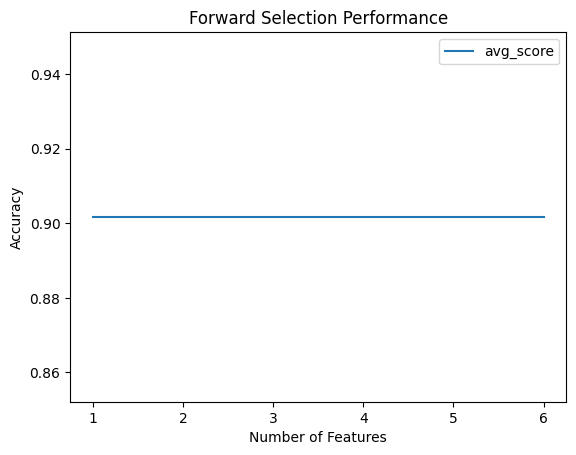

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Define the logistic regression model
model = LogisticRegression()
# Define the forward selection object with only 6 features.
sfs = SFS(model, k_features=6, forward=True, floating=False, scoring="accuracy", cv=5)
# Perform forward selection on the training set
sfs.fit(X_train, y_train)
# Print the selected features
print("Selected Features:", sfs.k_feature_names_)
# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)
# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

In [11]:
from sklearn.metrics import accuracy_score
X = X[list(sfs.k_feature_names_)]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test)*100)

91.4


C:\Users\Snehaa Kumari\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
import joblib as jlb
jlb.dump(model, "logisticRegression.pkl")

['logisticRegression.pkl']